# Transformations

Notebook to apply transformations to data.

In [4]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [25]:
# Read Data
music_data = np.loadtxt("Data/GeneratedData/CleanData_TDC/Music/CGS01_Music_CD/CGS01_Music_CD_20.txt")
rest_data = np.loadtxt("Data/GeneratedData/CleanData_TDC/Rest/CGS01_Rest_CD/CGS01_Rest_CD_20.txt")

## Plot Data

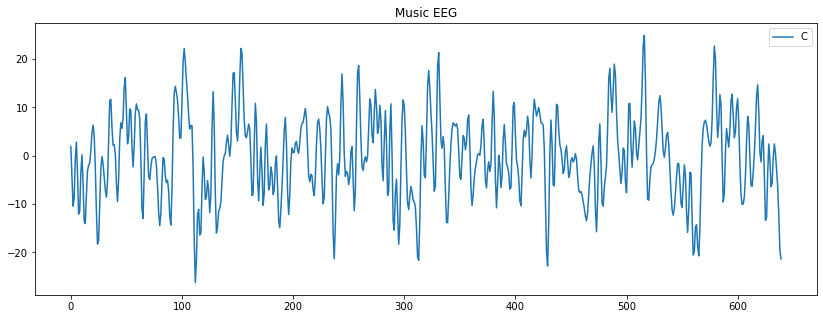

In [32]:
# Plot data
lines = plt.plot(music_data[0])

plt.legend(lines, "Channel 1")
plt.title("Music EEG")
plt.rcParams['figure.figsize'] = 14, 5
plt.show()

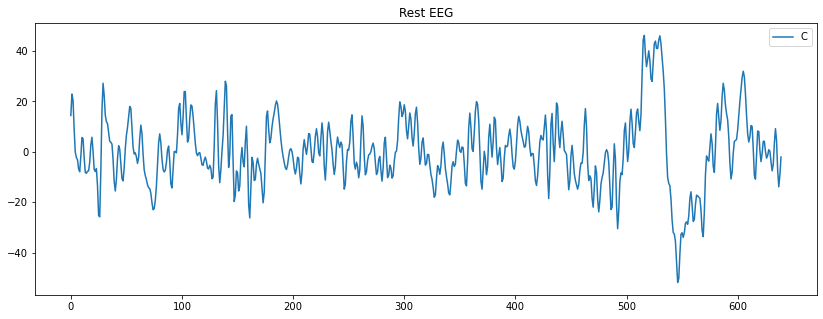

In [33]:
lines = plt.plot(rest_data[0])

plt.legend(lines, "Channel 1")
plt.title("Rest EEG")
plt.rcParams['figure.figsize'] = 14, 5
plt.show()

## Create Spectrograms

<ipython-input-43-c94d13568821>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, np.log10(Sxx))


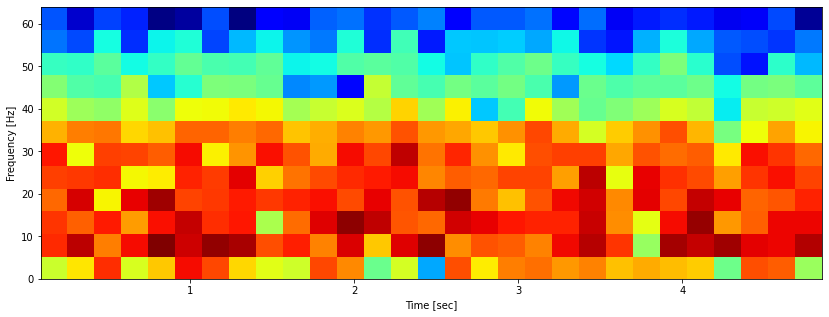

In [43]:
# Create Spectrogram
x = music_data[0]
fs = 128

f, t, Sxx = signal.spectrogram(x, fs, window = signal.tukey(24, .5))
plt.pcolormesh(t, f, np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Music EEG")
plt.set_cmap('jet')    # viridis
plt.rcParams['figure.figsize'] = 14, 5
plt.show()

<ipython-input-44-2ec362fa326b>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, np.log10(Sxx))


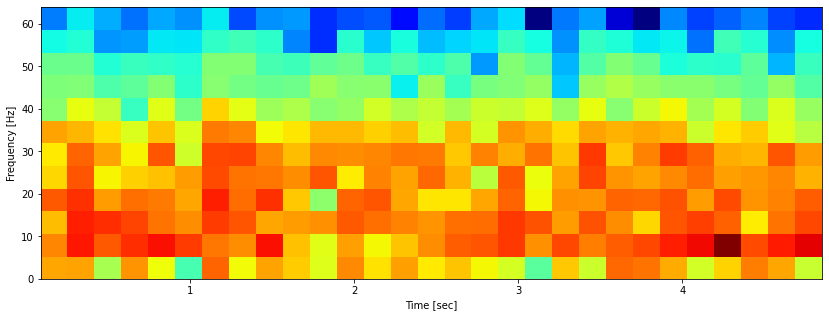

In [44]:
x = rest_data[0]
fs = 128

f, t, Sxx = signal.spectrogram(x, fs, window = signal.tukey(24, .5))
plt.pcolormesh(t, f, np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Rest EEG")
plt.set_cmap('jet')    # viridis
plt.rcParams['figure.figsize'] = 14, 5
plt.show()

## Continuous Wavelet Transform

In [45]:
# Scalogram function from Fusion notebook
# why downsample?
def scalogram(x, Hz, hz, start_sec, num_secs, w = 5., log = False):
    ''' x = time series
        Hz = sampling rate in Hz of the input signal
        hz = desired sampling rate (by downsampling)
        start_sec = starting second in x
        num_secs = total number of seconds of our clip
        w = width parameter
        log =raw_seiz if true take log of spectrum values
    '''

    downsample = int(round(Hz / hz))
    X = x[start_sec * Hz: (start_sec + num_secs) * Hz : downsample]
    #print('X.shape =', X.shape)plt.rcParams['figure.figsize'] = 10, 5
    #print('N =', N)
    #print('hz =', hz)

    t, dt = np.linspace(start_sec, start_sec + num_secs, hz * num_secs, retstep = True)
    #print('t.shape =', t.shape)
    #print('dt =', dt)fs
    fs = 1 / dt #
    #print('fs =', fs)

    freq = np.linspace(1, fs / 2, int(hz / 2))
    widths = w * fs / (2 * np.pi * freq)
    #print('widths.shape =', widths.shape)

    cwtm = signal.cwt(X,
                      signal.morlet2,
                      widths,
                      w = w)  #,
    #                  dtype = 'complex128')
    #print('cwtm.shape =', cwtm.shape)

    plt.rcParams['figure.figsize'] = 14, 5

    if log == False:
        im = plt.pcolormesh(t, freq, np.abs(cwtm), cmap = 'jet') # 'viridis'
    else:
        im = plt.pcolormesh(t, freq, np.log(np.abs(cwtm)), cmap = 'jet')

    plt.show()



Music EEG Scalogram


<ipython-input-45-7ecfc1136220>:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = plt.pcolormesh(t, freq, np.abs(cwtm), cmap = 'jet') # 'viridis'


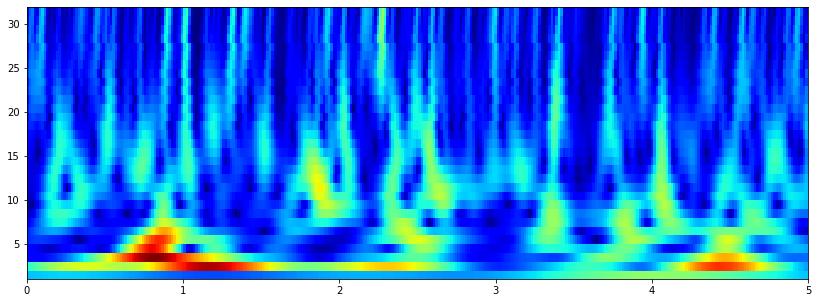

In [65]:
## Create Scalogram
x = music_data[0]
N = 128  # input signal sampling rate
hz = 64  # downsampled sampling rate
T = 5    # seconds
ts = 0   # starting second
w = 4.

# This time we'll z-transform the time series, and save the mean and std
# so we can apply this same transform to the seizure data.
x_mean, x_std = x.mean(), x.std()
x = (x - x_mean) / x_std

print()
print('Music EEG Scalogram')
scalogram(music_data[0], N, hz, ts, T, w)  #, True


Rest EEG Scalogram


<ipython-input-45-7ecfc1136220>:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = plt.pcolormesh(t, freq, np.abs(cwtm), cmap = 'jet') # 'viridis'


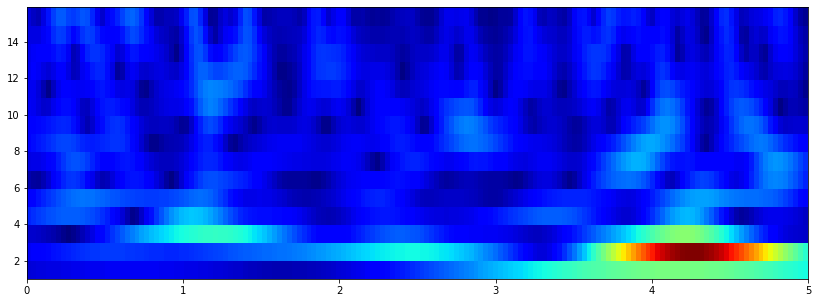

In [69]:
## Create Scalogram
x = rest_data[0]
N = 128  # input signal sampling rate
hz = 32  # downsampled sampling rate
T = 5    # seconds
ts = 0   # starting second
w = 6.

# This time we'll z-transform the time series, and save the mean and std
# so we can apply this same transform to the seizure data.
x_mean, x_std = x.mean(), x.std()
x = (x - x_mean) / x_std

print()
print('Rest EEG Scalogram')
scalogram(rest_data[0], N, hz, ts, T, w)  #, True
